# Модуль №16. Библиотеки для работы с ресурсами

In [ ]:
import sys
print(sys.version) 

## Dataclass
**Dataclass** в Python — это специальный декоратор `@dataclass` (введённый в версии Python 3.7), который упрощает создание классов для хранения данных. Он автоматически генерирует методы для работы с атрибутами класса, такие как `__init__`, `__repr__`, `__eq__`, и другие, что позволяет сократить рутинный код.

### Зачем нужен dataclass?
- **Упрощение кода**: Сокращает код для создания объектов, которые в основном содержат данные.
- **Автоматическое создание методов**: Создаёт конструктор (`__init__`), строковое представление (`__repr__`), а также методы сравнения (`__eq__`) без необходимости писать их вручную.
- **Повышение читаемости**: Код становится чище и легче поддерживается.
- **Работа с неизменяемыми объектами**: Можно создавать объекты, атрибуты которых нельзя изменить (immutable).


In [1]:
from dataclasses import dataclass

@dataclass
class Book:
    title: str
    author: str
    year: int
    price: float = 0.0  

# Создаём объект класса Book
book1 = Book("1984", "George Orwell", 1949, 15.99)
book2 = Book("Brave New World", "Aldous Huxley", 1932, 13.50)

# Автоматически создаются удобные методы
print(book1)  
print(book2)  
print(book1 == book2) # еще можно использовать != 

# Доступ к атрибутам
print(book1.title)  
print()

Book(title='1984', author='George Orwell', year=1949, price=15.99)
Book(title='Brave New World', author='Aldous Huxley', year=1932, price=13.5)
False
1984



### Пошатаем 

In [2]:
# Значение по умолчанию price = 0.0 
book3 = Book("1984", "George Orwell", 1949)
print(book3)  

Book(title='1984', author='George Orwell', year=1949, price=0.0)


In [3]:
book4 = Book("1984", "George Orwell")
print(book4)  

TypeError: Book.__init__() missing 1 required positional argument: 'year'

In [5]:
# Нет проверки типов? "1949" сейчас строка 
book5 = Book("1984", "George Orwell", "1949")
print(book5)  

Book(title='1984', author='George Orwell', year=[], price=0.0)


In [6]:
# Именованная передача аргументов 
book6 = Book(title="1984", author="George Orwell", year="1949", price=9)
print(book6)

Book(title='1984', author='George Orwell', year='1949', price=9)


## Pydantic
**Pydantic** — это мощная библиотека в Python для **валидации и сериализации данных**. Она позволяет создавать модели данных с валидацией "на лету", используя **аннотации типов**. Pydantic активно используется в таких фреймворках, как **FastAPI**, поскольку обеспечивает удобную проверку входных данных и преобразование их в нужные типы.  

### Зачем нужен Pydantic?
1. **Валидация на основе типов**: Pydantic использует **аннотации типов** для валидации. Например, если поле ожидает `int`, а передано `str`, будет вызвана ошибка.
2. **Преобразование данных**: Автоматически преобразует значения в нужные типы (например, строки в даты).
3. **Простота интеграции**: Поддерживает аннотации типов и работает с JSON, словарями и другими форматами.
4. **Значения по умолчанию**: Можно задавать значения по умолчанию для полей:
```python
class Product(BaseModel):
   name: str
   price: float = 0.0  # Значение по умолчанию
```
5. **Удобное использование с API**: Часто используется для описания схем данных при разработке RESTful API.


In [7]:
from pydantic import BaseModel, ValidationError
from datetime import date

class User(BaseModel):
    id: int
    name: str
    signup_date: date

# Создание валидной модели
user = User(id=1, name="Alice", signup_date="2024-10-15")
print(user)  

# Доступ к атрибутам модели
print(user.name)  
print(user.dict()) 

id=1 name='Alice' signup_date=datetime.date(2024, 10, 15)
Alice
{'id': 1, 'name': 'Alice', 'signup_date': datetime.date(2024, 10, 15)}


### Пошатаем 

In [8]:
user = User(id=1, name="Alice", signup_date="не_дата")
print(user)  

ValidationError: 1 validation error for User
signup_date
  invalid date format (type=value_error.date)

In [9]:
user = User(id=1, name=1000, signup_date="2024-10-15")
print(user)  

id=1 name='1000' signup_date=datetime.date(2024, 10, 15)


In [10]:
str(1000)

'1000'

In [13]:
user = User(id="text", name="Alice", signup_date="2024-10-15")
print(user)  

ValidationError: 1 validation error for User
id
  value is not a valid integer (type=type_error.integer)

In [11]:
user = User(id="1", name="Alice", signup_date="2024-10-15")
print(user)  

id=1 name='Alice' signup_date=datetime.date(2024, 10, 15)


In [12]:
int("1")

1

### Нестандартные валидации

In [14]:
import pydantic
print(pydantic.__version__)

1.10.15


In [15]:
from pydantic import validator # for version 1.x
# from pydantic import field_validator # for version 2.x

class User(BaseModel):
    name: str
    age: int

    # @field_validator('age')
    @validator('age')
    def check_age(cls, value):
        if value < 18:
            raise ValueError('Возраст должен быть не менее 18 лет')
        return value


user = User(name="Alice", age=70)
print(user)  

name='Alice' age=70


In [16]:
# Value error, Возраст должен быть не менее 18 лет 
user = User(name="Alice", age=7)
print(user)  

ValidationError: 1 validation error for User
age
  Возраст должен быть не менее 18 лет (type=value_error)

## Сравним датаклассы и Pydantic модели:

### Основные сходства:

1. Оба предоставляют удобный способ создания классов для хранения данных.

2. Оба поддерживают аннотации типов и автоматически генерируют методы `__init__()`, `__repr__()`, `__eq__()`, `__hash__()`, и другие специальные методы.

3. Оба позволяют определять структуру данных с полями и их типами.

### Основные различия:

1. Валидация данных:
   - Датаклассы не валидируют входные данные по умолчанию. Разработчику нужно самостоятельно реализовать логику валидации.
   - Pydantic модели автоматически валидируют входные данные на соответствие определенным типам и ограничениям.

2. Типобезопасность:
   - Датаклассы используют аннотации типов, но не выполняют проверки типов во время выполнения.
   - Pydantic модели выполняют строгую проверку типов при создании экземпляров.

3. Сериализация/десериализация:
   - Датаклассы не имеют встроенной функциональности сериализации/десериализации.
   - Pydantic модели могут легко сериализовать и десериализовать данные в JSON и другие форматы.

4. Конфигурация:
   - Датаклассы не имеют встроенных механизмов конфигурации.
   - Pydantic модели предоставляют возможность настройки поведения валидации и сериализации через конфигурацию модели.

5. Вложенные модели:
   - Датаклассы не поддерживают вложенные классы напрямую.
   - Pydantic модели полностью поддерживают вложенные модели.

6. Кастомные валидаторы:
   - Датаклассы требуют ручного реализации логики валидации.
   - Pydantic модели предоставляют систему кастомных валидаторов для более сложной логики валидации.

7. Производительность:
   - Датаклассы обычно легче по размеру и быстрее в выполнении.
   - Pydantic модели могут иметь небольшой накладной расход из-за дополнительной функциональности, но эта разница часто незаметна в большинстве случаев использования.

### Когда использовать что:

- Используйте датаклассы, когда вам нужна простая структура данных без сложной логики валидации или сериализации.
- Используйте Pydantic модели, когда требуется строгая типобезопасность, автоматическая валидация данных и удобная сериализация/десериализация.

В целом, Pydantic предоставляет более мощный и гибкий инструментарий, но требует больше настроек изначально. Датаклассы проще в использовании, но менее функциональны по сравнению с Pydantic моделями.



## Установка и настройка окружения  

### Установка для Python 3.10.9 и выше
Для начала установим необходимые пакеты с помощью `pip`:

```bash
pip install fastapi uvicorn
```

После установки вы получите следующие версии библиотек:

```
annotated-types==0.7.0
anyio==4.6.2.post1
click==8.1.7
exceptiongroup==1.2.2
fastapi==0.115.2
h11==0.14.0
idna==3.10
pydantic==2.9.2
pydantic_core==2.23.4
sniffio==1.3.1
starlette==0.39.2
typing_extensions==4.12.2
uvicorn==0.31.1
```

### Установка для Python 3.9  
Для версии Python 3.9 можно воспользоваться файлом зависимостей `requirements.txt`:

**requirements.txt:**

```
fastapi==0.111.0
uvicorn==0.17.6
pydantic==1.10.18
```

Чтобы установить все необходимые библиотеки из этого файла, выполните команду:

```bash
pip install -r requirements.txt
```


## Зачем нужен uvicorn

**Uvicorn** — это высокопроизводительный ASGI-сервер (Asynchronous Server Gateway Interface) на Python. Он используется для запуска современных веб-приложений и API, созданных с помощью таких фреймворков, как **FastAPI** и **Starlette**. Вот ключевые особенности и информация о Uvicorn:  

### Основные характеристики:
1. **Асинхронность**: Использует `asyncio` и `uvloop` для поддержки высоких нагрузок и асинхронного ввода/вывода.
2. **Лёгкий и быстрый**: Изначально разрабатывался для производительности и низкой задержки.
3. **Поддержка WebSocket**: Хорошо подходит для приложений, использующих WebSocket.
4. **Совместимость с ASGI**: Поддерживает любой фреймворк, который реализует спецификацию ASGI.
5. **Горячий перезапуск**: Может перезапускаться автоматически при изменениях кода, что удобно для разработки.


### Опции запуска:
- `--reload`: Автоматический перезапуск при изменении кода (полезно в режиме разработки).
- `--host 0.0.0.0`: Делает приложение доступным извне.
- `--port 8000`: Указывает порт, на котором будет работать приложение.

Uvicorn часто используется для создания и развертывания микросервисов или API благодаря своей производительности и простоте интеграции с популярными асинхронными фреймворками.

## Как запустить сервер?

   ```bash
   uvicorn main:app --reload
   ```

Здесь `main:app` указывает на имя файла (`main.py`) и имя объекта приложения (`app`).


## Альтернативные параметры команды

1. **Запуск на другом порту**: Запускает приложение на порту **8080** (по умолчанию используется порт 8000).
   
```bash
uvicorn main:app --reload --port 8080
```

3. **Указание хоста**: Запускает сервер, доступный для всех устройств в сети (например, для тестирования на другом компьютере в той же сети).
   
```bash
uvicorn main:app --reload --host 0.0.0.0
```

5. **Без перезагрузки**: Запуск сервера без автоматической перезагрузки (обычно используется в **production**, когда код больше не изменяется).
   
```bash
uvicorn main:app
```

## Одна ошибка и ты ошибся 

Когда нужно завершить процесс, использующий определённый порт (например, **порт 8000**), можно воспользоваться следующими командами.

---

#### 1. Поиск процесса, занятого портом  
Чтобы узнать, какой процесс использует нужный порт, используем команду:

```bash
lsof -i :8000
```

**Результат:**
```
COMMAND   PID   USER   FD   TYPE   DEVICE SIZE/OFF NODE NAME
python   12345  user   3u   IPv4   654321      0t0  TCP *:8000 (LISTEN)
```

- **COMMAND** — имя команды, запустившей процесс (в данном случае Python).
- **PID** — идентификатор процесса (**12345** в этом примере).
- **NAME** — порт, который слушает процесс.

---

#### 2. Завершение процесса  
Как только вы нашли нужный PID (например, **12345**), можно завершить процесс с помощью команды:

```bash
kill -9 12345
```

- **`kill`** — команда для отправки сигнала процессу.
- **`-9`** — сигнал **SIGKILL**, который немедленно завершает процесс.
- **12345** — идентификатор процесса (PID), который мы нашли ранее.

---

#### Полезные советы:
- Будьте осторожны с использованием **`kill -9`**, так как он завершает процесс без возможности корректного завершения (например, без сохранения данных).
- Если хотите завершить процесс более мягко, используйте:
```bash
kill 12345
```
  Это отправит сигнал **SIGTERM**, который позволит процессу завершиться корректно.



## Что произойдет при запуске?

- **Uvicorn** поднимет сервер на адресе http://127.0.0.1:8000 (по умолчанию).
- Вы сможете получить доступ к **Swagger UI** по адресу [http://127.0.0.1:8000/docs](http://127.0.0.1:8000/docs)
- Вы сможете получить доступ к  **ReDoc** по адресу [http://127.0.0.1:8000/redoc](http://127.0.0.1:8000/redoc)
- Любые изменения в коде автоматически перезапустят сервер.


## Что такое Swagger

**Swagger** — это набор инструментов для документирования и тестирования API. Он позволяет разработчикам легко описывать структуру API, генерировать интерактивную документацию и тестировать запросы. Swagger стал стандартом де-факто для документирования RESTful API и активно используется в таких фреймворках, как **FastAPI**.  

### Зачем использовать Swagger?
- **Прозрачность и удобство**: Позволяет всем заинтересованным сторонам (разработчикам, тестировщикам, бизнес-аналитикам) понять, как работает API.
- **Интерактивное тестирование**: Прямо в интерфейсе можно отправлять запросы и получать ответы без необходимости писать дополнительный код.
- **Автоматизация документации**: Документация генерируется автоматически из описания API, что снижает вероятность ошибок.
- **Генерация кода**: Swagger позволяет генерировать код клиентов и серверов для разных языков на основе спецификации.


## Базовая структура проекта FastAPI 
```
my_fastapi_project/
│
├── app/
│   ├── main.py              # Точка входа в приложение (запуск API)
│   ├── routers/             # Маршрутизация (разделение эндпоинтов по модулям)
│   │   ├── users.py         # Маршруты для управления пользователями
│   │   └── items.py         # Маршруты для работы с товарами
│   ├── models/              # Модели данных (Pydantic и ORM)
│   │   └── item_model.py    
│   ├── database.py          # Подключение к базе данных
│   ├── dependencies.py      # Вспомогательные зависимости (например, middleware)
│   └── config.py            # Конфигурация приложения (настройки и переменные окружения)
│
├── Dockerfile               # Конфигурация для контейнеризации
├── .env                     # Переменные окружения
├── requirements.txt         # Список зависимостей (устанавливаемые библиотеки)
└── README.md                # Документация проекта
```

## CRUD - запросы

**CRUD** — это акроним, обозначающий четыре основные операции с данными: 
- Create (создание) → POST
- Read (чтение) → GET
- Update (обновление) → PUT 
- Delete (удаление) → DELETE



## Разбор заданий FAST API

### **Задача "Начало пути"**

Подготовка:
- Установите фреймворк FastAPI при помощи пакетного менеджера pip. Версию Python можете выбрать самостоятельно (3.9 - 3.12).

Маршрутизация:
1. Создайте приложение(объект) FastAPI предварительно импортировав класс для него.
2. Создайте маршрут к главной странице - "/". По нему должно выводиться сообщение "Главная страница".
3. Создайте маршрут к странице администратора - "/user/admin". По нему должно выводиться сообщение "Вы вошли как администратор".
4. Создайте маршрут к страницам пользователей используя параметр в пути - "/user/{user_id}". По нему должно выводиться сообщение "Вы вошли как пользователь № <user_id>".
5. Создайте маршрут к страницам пользователей передавая данные в адресной строке - "/user". По нему должно выводиться сообщение "Информация о пользователе. Имя: <username>, Возраст: <age>".


Примечания:
- Все маршруты пишутся при помощи GET запроса.
- Помните о важности порядка записи запросов в вашем файле.
- Названия функций можете придумать самостоятельно с учётом логики прописанной в них.

In [ ]:
from fastapi import FastAPI
app = FastAPI(swagger_ui_parameters={"tryItOutEnabled": True})

# http://127.0.0.1:8000/
@app.get('/')
async def get_main_page():
    return "Главная страница"

# http://127.0.0.1:8000/user/admin
@app.get('/user/admin')
async def get_admin_page():
    return 'Вы вошли как администратор'

# http://127.0.0.1:8000/user/100
@app.get('/user/{user_id}')
async def get_user_number(user_id: int):
    return f'Вы вошли как пользователь № {user_id}'

# http://127.0.0.1:8000/user
# http://127.0.0.1:8000/user?username=NewName&age=10
@app.get('/user')
async def get_user_info(username: str = 'Name', age: int = 100):
    return f'Информация о пользователе. Имя: {username}, Возраст {age}.'

# uvicorn main:app --reload


# http://127.0.0.1:8000/docs

### **Задача "Имитация работы с БД"**

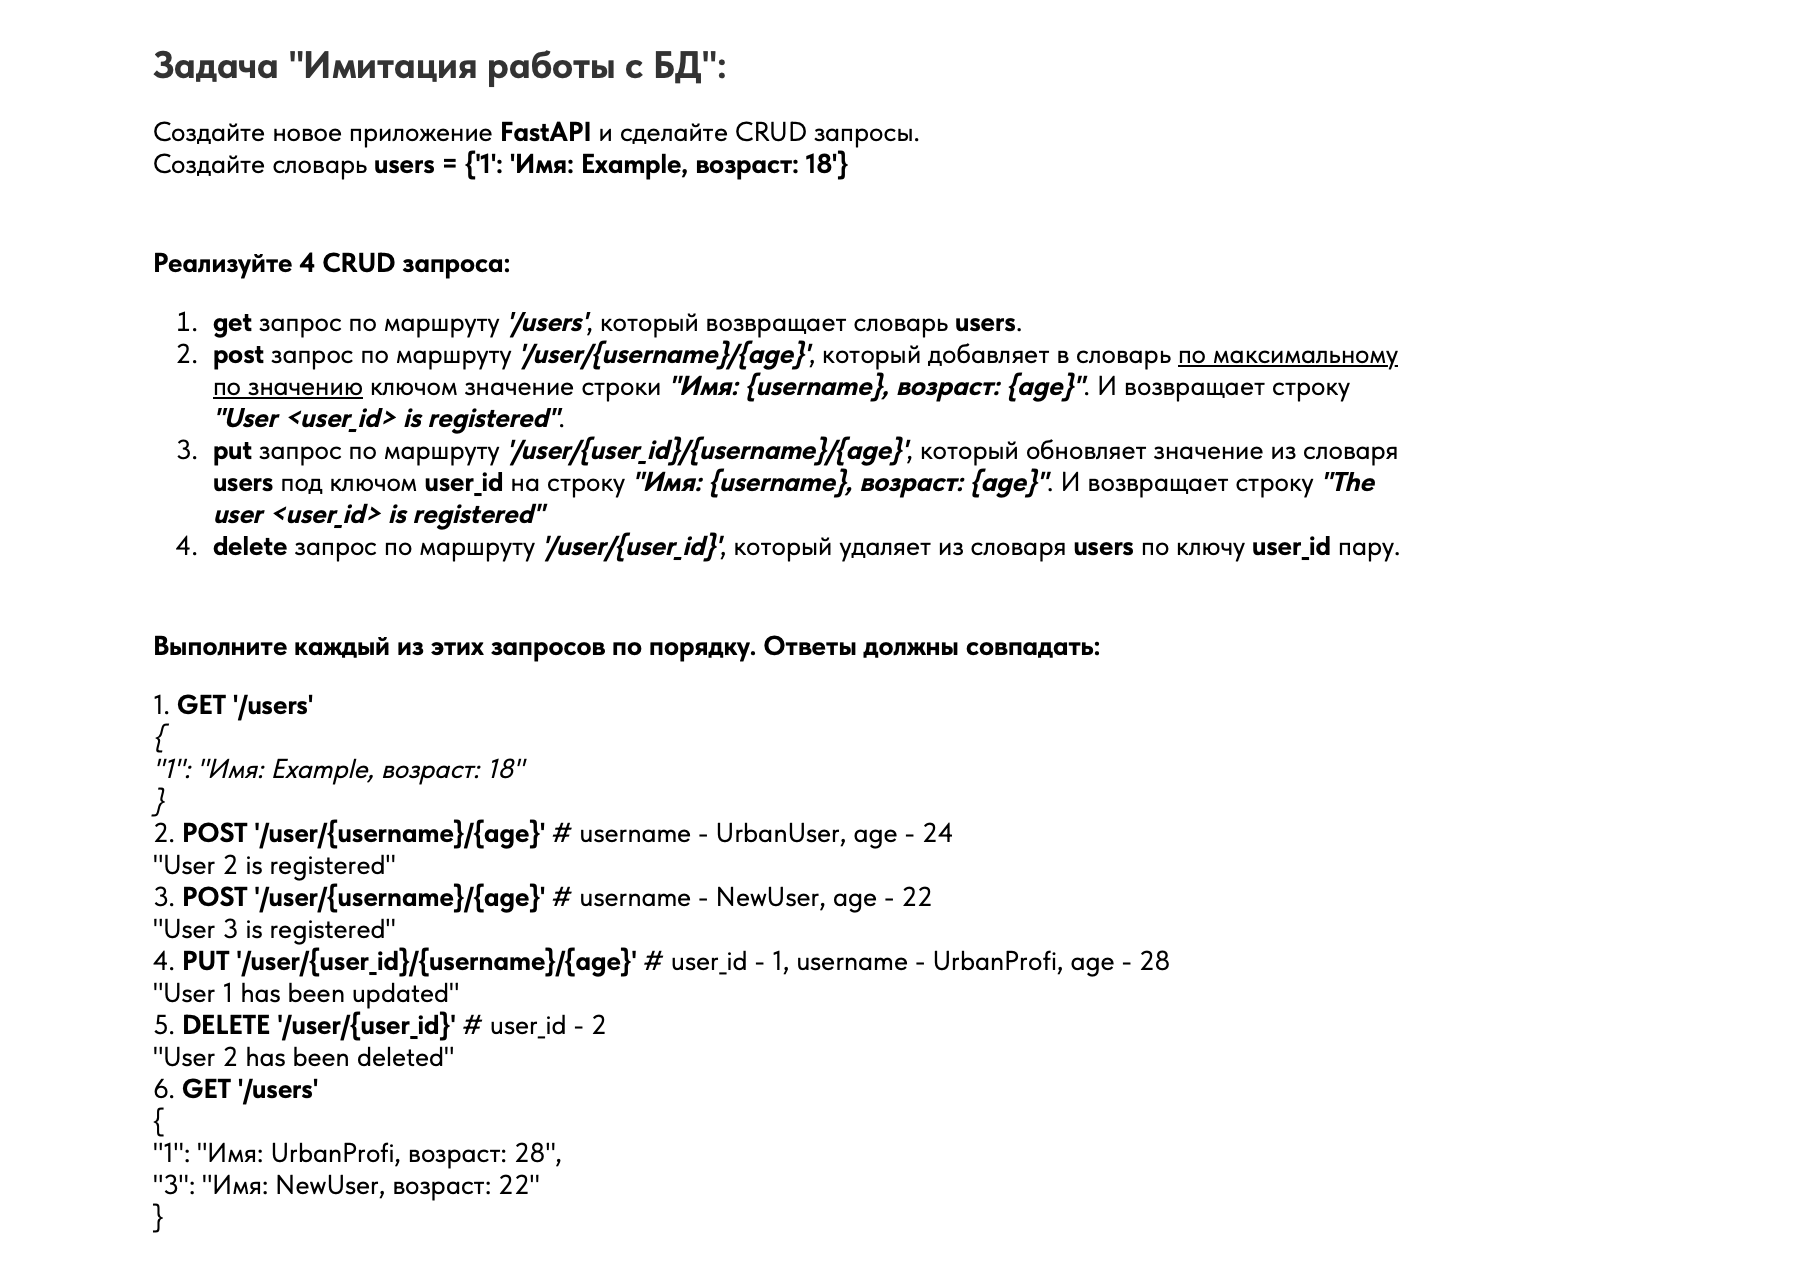

In [ ]:
from fastapi import FastAPI, Path
from typing import Annotated
app = FastAPI(swagger_ui_parameters={"tryItOutEnabled": True})

# Task 3

users = {'1': 'Имя: Example, возраст: 18'}


@app.get('/users')
async def get_users():
    return users


@app.post('/user/{username}/{age}')
async def post_user(
    username: Annotated[str, Path(min_length=5, max_length=20, description='Enter username', example='UrbanUser')],
    age: Annotated[int, Path(le=120, ge=18, description='Enter age', example='24')]
):
    user_id = str(int(max(users, key=int)) + 1)
    users.update({user_id: f'Имя: {username}, возраст: {age}'})
    return f'User {user_id} is registered'


@app.put('/user/{user_id}/{username}/{age}')
async def update_user(
    user_id: Annotated[int, Path(ge=1, le=100, description='Enter User ID', example='1')],
    username: Annotated[str, Path(min_length=5, max_length=20, description='Enter username', example='UrbanUser')],
    age: Annotated[int, Path(le=120, ge=18, description='Enter age', example='24')]
):
    users[user_id] = f'Имя: {username}, возраст: {age}'
    return f'User {user_id} has been updated'


@app.delete('/user/{user_id}')
async def delete_user(
    user_id: Annotated[int, Path(ge=1, le=100, description='Enter User ID', example='1')],
):
    users.pop(str(user_id))
    return f'User {user_id} has been deleted'

# uvicorn main:app --reload 


### **Что такое `Path` в FastAPI?**

`Path` — это функция из FastAPI, которая используется для **валидации и документирования параметров пути** (path parameters). Параметры пути — это значения, передаваемые через URL, которые становятся частью маршрута. С помощью `Path` можно задавать **ограничения и метаданные** для таких параметров, например: минимальные и максимальные значения, описание параметра или пример его использования.


### **Как работает `Annotated` из модуля `typing`**

`Annotated` в Python (начиная с версии 3.9 и более полно поддерживается в FastAPI) позволяет добавлять **дополнительную информацию** к аннотированным типам. В контексте FastAPI это полезно для добавления метаданных, таких как ограничения и описания для параметров запросов, маршрутов и тел запросов. 

Основное назначение `Annotated` — разделить **тип данных** и **дополнительные инструкции или ограничения** для этого типа. Это особенно полезно в FastAPI для работы с параметрами пути, query-параметрами и валидацией тела запроса.

---

### **Синтаксис `Annotated`**

```python
from typing import Annotated
```

`Annotated` используется следующим образом:

```python
Annotated[основной_тип, метаданные]
```

- **основной_тип**: это тип данных, который должен быть передан (например, `int`, `str` и т. д.).
- **метаданные**: это дополнительные инструкции или ограничения (например, валидация, описание).



In [ ]:
from typing import List

def func(x: List[List[str]])